In [1]:
import os
import sys

sys.path.append(os.path.abspath('..'))

In [2]:
from delay_optimizer import DelayedOptimizer
from delay_optimizer.optimization.functions import Ackley, Rastrigin, Rosenbrock, Zakharov
from delay_optimizer.optimization.optimizers import GradientDescent, Momentum, Adam
from delay_optimizer.delays.distributions import Undelayed, Uniform, Stochastic
import numpy as np

# Test the functions

## Basic Initialization

In [8]:
Ackley(2).__dict__

{'n': 2,
 'domain': (-32.768, 32.768),
 'minimizer': array([0., 0.]),
 'a': 20.0,
 'b': 0.2,
 'c': 6.283185307179586}

In [9]:
Rastrigin(10).__dict__

{'n': 10,
 'domain': (-5.12, 5.12),
 'minimizer': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}

In [10]:
Rosenbrock(100).__dict__

{'n': 100,
 'domain': (-5.0, 10.0),
 'minimizer': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'a': 1.0,
 'b': 100.0}

In [11]:
Zakharov(1000).__dict__

{'n': 1000,
 'domain': (-5.0, 10.0),
 'minimizer': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.

## Loss Evaluation

In [12]:
import numpy as np

X = np.random.rand(100,10000)
dims = [2, 10, 100, 1000, 10000]

In [13]:
import time
from delay_optimizer.functions.old_functions import (
    ackley_gen,
    rastrigin_gen,
    rosenbrock_gen,
    zakharov_gen
)

def get_old_loss_function(func):
    match str(func).lower():
        case 'ackley':
            return ackley_gen(func.n)
        case 'rastrigin':
            return rastrigin_gen(func.n)
        case 'rosenbrock':
            return rosenbrock_gen(func.n)
        case 'zakharov':
            return zakharov_gen(func.n)

def test_loss(func, x, n):
    f = func(n)
    f_old = get_old_loss_function(f)
    x = x[:,:n]

    t0 = time.time()
    f1 = f.loss(x)
    t1 = time.time()
    f2 = [f.loss(x[i]) for i in range(x.shape[0])]
    t2 = time.time()
    f3 = [f_old(x[i]) for i in range(x.shape[0])]
    t3 = time.time()

    assert np.allclose(f1, f3)
    assert np.allclose(f1, f2)
    assert np.allclose(f2, f3)
    return t1-t0, t2-t1, t3-t2

ModuleNotFoundError: No module named 'delay_optimizer.functions'

In [ ]:
# Ackley
for d in dims:
    print(*test_loss(Ackley, X, d))

0.0001857280731201172 0.0018610954284667969 0.0018894672393798828
0.0009121894836425781 0.0018253326416015625 0.010658979415893555
0.0004627704620361328 0.002258777618408203 0.002112150192260742
0.005427122116088867 0.007301807403564453 0.004945993423461914
0.038039445877075195 0.027659177780151367 0.026062488555908203


In [ ]:
# Rastrigin
for d in dims:
    print(*test_loss(Rastrigin, X, d))

0.00011301040649414062 0.0010266304016113281 0.0009617805480957031
0.0006196498870849609 0.0011293888092041016 0.0010020732879638672
0.0017309188842773438 0.0014655590057373047 0.0014944076538085938
0.003254413604736328 0.0034799575805664062 0.0033440589904785156
0.025737762451171875 0.021487712860107422 0.018725872039794922


In [ ]:
# Rosenbrock
for d in dims:
    print(*test_loss(Rosenbrock, X, d))

7.128715515136719e-05 0.0008788108825683594 0.0011162757873535156
0.0002727508544921875 0.0009210109710693359 0.0011589527130126953
0.0011010169982910156 0.0010349750518798828 0.0012493133544921875
0.0015153884887695312 0.0016238689422607422 0.0019321441650390625
0.011744976043701172 0.004252910614013672 0.0045812129974365234


In [ ]:
# Zakharov
for d in dims:
    print(*test_loss(Zakharov, X, d))

0.00015473365783691406 0.0061414241790771484 0.005188941955566406
0.0002658367156982422 0.0066127777099609375 0.0019745826721191406
0.0012171268463134766 0.002131938934326172 0.0014562606811523438
0.0003635883331298828 0.0016679763793945312 0.0017631053924560547
0.004600048065185547 0.003712892532348633 0.005046367645263672


## Gradient Evaluation

In [ ]:
import numpy as np

X = np.random.rand(100,10000)
dims = [2, 10, 100, 1000, 10000]

In [ ]:
import time
from delay_optimizer.functions.old_functions import (
    ackley_deriv_gen,
    rast_deriv_gen,
    rosen_deriv_gen,
    zakharov_deriv_gen
)

def get_old_grad_function(func):
    match str(func).lower():
        case 'ackley':
            return ackley_deriv_gen(func.n)
        case 'rastrigin':
            return rast_deriv_gen(func.n)
        case 'rosenbrock':
            return rosen_deriv_gen(func.n)
        case 'zakharov':
            return zakharov_deriv_gen(func.n)

def test_grad(func, x, n):
    f = func(n)
    f_old = get_old_grad_function(f)
    x = x[:,:n]

    t0 = time.time()
    f1 = f.grad(x)
    t1 = time.time()
    f2 = [f.grad(x[i]) for i in range(x.shape[0])]
    t2 = time.time()
    f3 = [f_old(x[i]) for i in range(x.shape[0])]
    t3 = time.time()

    assert np.allclose(f1, f3)
    assert np.allclose(f1, f2)
    assert np.allclose(f2, f3)
    return t1-t0, t2-t1, t3-t2

In [ ]:
# Ackley
for d in dims:
    print(*test_grad(Ackley, X, d))

0.00018334388732910156 0.003925800323486328 0.003774881362915039
0.004918575286865234 0.008687734603881836 0.006947040557861328
0.0012769699096679688 0.0055997371673583984 0.006273508071899414
0.0071866512298583984 0.009026288986206055 0.008199453353881836
0.050015926361083984 0.04297304153442383 0.041222333908081055


In [ ]:
# Rastrigin
for d in dims:
    print(*test_grad(Rastrigin, X, d))

7.510185241699219e-05 0.0005922317504882812 0.0004990100860595703
0.00030732154846191406 0.0006930828094482422 0.0005869865417480469
0.0003857612609863281 0.0015645027160644531 0.0008997917175292969
0.0025892257690429688 0.0034923553466796875 0.0025403499603271484
0.02410435676574707 0.02041769027709961 0.019176483154296875


In [ ]:
# Rosenbrock
for d in dims:
    print(*test_grad(Rosenbrock, X, d))

0.0001246929168701172 0.005778789520263672 0.006569862365722656
0.0005772113800048828 0.0049724578857421875 0.005286216735839844
0.00026535987854003906 0.0017685890197753906 0.0017848014831542969
0.0024566650390625 0.0026204586029052734 0.0026044845581054688
0.01853799819946289 0.009824514389038086 0.00918269157409668


In [ ]:
# Zakharov
for d in dims:
    print(*test_grad(Zakharov, X, d))

0.0001373291015625 0.005235910415649414 0.009942054748535156
0.00042366981506347656 0.0015664100646972656 0.0012929439544677734
0.004384756088256836 0.0016946792602539062 0.0013718605041503906
0.0006747245788574219 0.002216339111328125 0.004332304000854492
0.013399362564086914 0.00696110725402832 0.015995025634765625


# Test the new Optimizers

In [3]:
from delay_optimizer.optimization import schedulers as lr_gen

In [4]:
objective = Ackley(10)
X = np.random.uniform(*objective.domain, size=(25, 10))

In [5]:
import time
from delay_optimizer.optimization.old_optimizers import (
    GradientDescent as GradientDescentOld,
    Adam as AdamOld,
    Momentum as MomentumOld,
)

def get_old_optimizer(optimizer):
    match optimizer.__class__.__name__:
        case 'GradientDescent':
            return GradientDescentOld
        case 'Adam':
            return AdamOld
        case 'Momentum':
            return MomentumOld

def test_optimizer(optimizer, objective, X, **kwargs):
    opt = optimizer(**kwargs)
    kwargs['learning_rate'] = kwargs['lr']
    opt_old = get_old_optimizer(opt)(params=kwargs) # Doesn't account for epsilon param

    for x in X:
        opt.initialize(x)
        opt_old.initialize(x)

        for i in range(1000):    # Maxiter=1000
            grad = objective.grad(x)

            x1 = opt.step(x, grad)
            x2 = opt_old(x, grad, i+1)
            try:
                assert np.allclose(x1, x2)
            except:
                print("")
                print(x1)
                print(x2)
                print(i)
                raise
            x = x1

In [6]:
test_optimizer(GradientDescent, objective, X, lr=lr_gen.constant(0.01))

In [7]:
test_optimizer(Adam, objective, X, lr=lr_gen.constant(0.01), beta_1=0.9, beta_2=0.999)

In [8]:
test_optimizer(Momentum, objective, X, lr=lr_gen.constant(0.01), gamma=0.8)

# Test the new Delayer

In [ ]:
from delay_optimizer.generators import learning_rate_generator as lr_gen
from delay_optimizer.generators.delay_distributions import Cyclical

In [ ]:
objective = Rastrigin(2)
optimizer = Adam
maxiter = 1000
delay_type = Cyclical([np.array([0,0]), np.array([1,0]), np.array([0,1]), np.array([1,1])], maxiter)
X = np.random.uniform(*objective.domain, size=(100, 2))

params = {'lr': lr_gen.constant(0.01), 'beta_1': 0.9, 'beta_2': 0.999}

In [ ]:
from delay_optimizer.optimizers.old_Delayer import Delayer as DelayerOld

def test_delayer(objective, optimizer, delay_type, X, maxiter=1000, **kwargs):
    optimizer = optimizer(**kwargs)
    kwargs['learning_rate'] = kwargs['lr']
    optimizer_old = get_old_optimizer(optimizer)(kwargs)
    delayer = Delayer(objective, optimizer, delay_type)
    delayer_old = DelayerOld(delay_type, objective, optimizer_old)

    for x in X:
        delayer.initialize(x)
        delayer_old.initialize(x)
        D_gen = delay_type.D_gen(objective.n)
        
        for i in range(1, maxiter+1):
            delayer.step()
            x1 = delayer.time_series[0]
            x2 = delayer_old.update(i, next(D_gen))
            try:
                assert np.allclose(x1, x2)
            except:
                print("")
                print(x1)
                print(x2)
                print(i)
                raise
            x = x1


In [ ]:
test_delayer(objective, optimizer, delay_type, X, maxiter=maxiter, **params)

# Test Parallel Changes

## Delay Distributions

In [26]:
from delay_optimizer.delays.distributions import (
    Undelayed, 
    Uniform, 
    Stochastic, 
    Decaying, 
    Partial, 
    Cyclical,
    Constant
)

def test_delay_type(delay_type):
    for size in [2, (2,), (5,2), (3,1,2), (10,5,3,2)]:
        D_gen = delay_type.D_gen(size)
        check_size = size if not isinstance(size, int) else tuple([size])
        for i in range(delay_type.num_delays+10):
            assert next(D_gen).shape == check_size

In [27]:
test_delay_type(Undelayed())

In [28]:
test_delay_type(Uniform(max_L=1, num_delays=10))

In [29]:
test_delay_type(Stochastic(max_L=1, num_delays=10))

In [30]:
test_delay_type(Decaying(max_L=1, num_delays=10))

In [31]:
test_delay_type(Partial(max_L=1, num_delays=10, p=0.5))

In [32]:
D = [np.array([0,0]), np.array([1,0]), np.array([0,1]), np.array([1,1])]
test_delay_type(Cyclical(D, num_delays=10))

In [33]:
D = np.array([1,0])
test_delay_type(Constant(D, num_delays=10))

## Numpy Parallel Optimizers

In [3]:
import time
from delay_optimizer.optimization.old_optimizers import (
    GradientDescent as GradientDescentOld,
    Adam as AdamOld,
    Momentum as MomentumOld,
)
from delay_optimizer.optimization import schedulers as lr_gen

def get_old_optimizer(optimizer):
    match optimizer.__class__.__name__:
        case 'GradientDescent':
            return GradientDescentOld
        case 'Adam':
            return AdamOld
        case 'Momentum':
            return MomentumOld

def test_parallel_optimizer(optimizer, objective, X, maxiter=5000, **kwargs):
    opt = optimizer(**kwargs)
    kwargs['learning_rate'] = kwargs['lr']
    opt_old = get_old_optimizer(opt)(params=kwargs) # Doesn't account for epsilon param

    def loop(optimizer, x_init, is_old=False):
        x = x_init
        for i in range(maxiter):
            grad = objective.grad(x)
            assert grad.shape == x.shape
            if is_old:
                x = optimizer(x, grad, i+1)
            else:
                x = optimizer.step(x, grad)
        return x

    start1 = time.time()
    opt.initialize(X)
    final_X = loop(opt, X, False)
    print("Time taken for new optimizer:", time.time()-start1)

    final_X_old = []
    start2 = time.time()
    for x in X:
        opt_old.initialize(x)
        final_X_old.append(loop(opt_old, x, True))
    print("Time taken for old optimizer:", time.time()-start2)

    try:
        assert np.allclose(final_X, final_X_old)
    except:
        print("")
        mask = ~np.isclose(final_X, final_X_old)
        print(final_X[mask])
        print(np.array(final_X_old)[mask])
        raise
        

In [10]:
objective = Ackley(10)
X = np.random.uniform(*objective.domain, size=(100, 10))

In [11]:
test_parallel_optimizer(GradientDescent, objective, X, lr=lr_gen.constant(0.01))

Time taken for new optimizer: 0.33013296127319336
Time taken for old optimizer: 13.63086748123169


In [12]:
test_parallel_optimizer(Adam, objective, X, lr=lr_gen.constant(0.01), beta_1=0.9, beta_2=0.999)

Time taken for new optimizer: 0.4525609016418457
Time taken for old optimizer: 22.806904077529907


In [13]:
test_parallel_optimizer(Momentum, objective, X, lr=lr_gen.constant(0.01), gamma=0.8)

Time taken for new optimizer: 0.36785125732421875
Time taken for old optimizer: 14.358436346054077


## Numpy Parallel Delayer

In [16]:
from delay_optimizer.delays.old_Delayer import Delayer as DelayerOld
from delay_optimizer.optimization import schedulers as lr_gen
from delay_optimizer.delays.distributions import Cyclical

def test_parallel_delayer(objective, optimizer, delay_type, X, maxiter=1000, **kwargs):
    optimizer = optimizer(**kwargs)
    kwargs['learning_rate'] = kwargs['lr']
    optimizer_old = get_old_optimizer(optimizer)(kwargs)
    delayer = DelayedOptimizer(objective, optimizer, delay_type)
    delayer_old = DelayerOld(delay_type, objective, optimizer_old, save_state=True)

    start1 = time.time()
    final_X = delayer.optimize(X, maxiter)
    print("Time taken for new delayer:", time.time()-start1)

    start2 = time.time()
    final_X_old = []
    for x in X:
        final_X_old.append(delayer_old.optimize(x, maxiter).state_vals[-1])
    print("Time taken for old delayer:", time.time()-start2)
    
    try:
        assert np.allclose(final_X, final_X_old)
    except:
        print("")
        print(final_X)
        print(final_X_old)
        raise

In [17]:
objective = Rastrigin(10)
optimizer = Adam
maxiter = 1000

D = np.random.randint(0,4,(4,10))
delay_type = Cyclical(D, num_delays=maxiter)
X = np.random.uniform(*objective.domain, size=(100, 10))

params = {'lr': lr_gen.constant(0.01), 'beta_1': 0.9, 'beta_2': 0.999}

In [18]:
test_parallel_delayer(objective, optimizer, delay_type, X, maxiter=maxiter, **params)

Time taken for new delayer: 0.1709308624267578
Time taken for old delayer: 10.97342324256897


# Full Length Timed Run

In [4]:
from delay_optimizer import optimizers, functions, DelayedOptimizer
from delay_optimizer.delays import distributions
import numpy as np

optimizer = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999)
objective = functions.Zakharov(1000)
maxiter = 10000
delay_type = distributions.Stochastic(max_L=1, num_delays=maxiter)
X = np.random.uniform(*objective.domain, size=(1000, 1000))

delayer = DelayedOptimizer(objective, optimizer, delay_type)
delayer.optimize(X, maxiter=maxiter)

array([[ 0.44316952,  0.71069238, -6.7132886 , ..., -4.54592862,
        -0.50964139, -1.6709056 ],
       [ 2.65895653, -4.58637929,  5.075438  , ..., -4.72365731,
         7.28903772, -1.8125978 ],
       [-3.58935223,  0.34003511, -4.29081049, ..., -3.26300843,
         7.17691409, -3.16623606],
       ...,
       [ 7.34487282,  4.89893381, -1.86016198, ..., -0.27419088,
         4.61734544,  6.80495955],
       [ 1.83187627,  3.53682214, -1.79889252, ...,  1.85404465,
        -2.88804457, -7.40060427],
       [-6.86166156, -7.5168008 ,  3.43053027, ...,  3.48710383,
         1.7711286 ,  4.15824122]])

With a time of around 7 mins, assuming this run would have been around 2-3 hours, we have around a 20x speedup

In [9]:
kwargs = {"val1": 1, "val2":2}

def func1(**kwargs):
    for k, v in kwargs.items():
        if k == "val1":
            del kwargs[k]
    return kwargs

print(kwargs)
print(func1(**kwargs))
print(kwargs)

{'val1': 1, 'val2': 2}


RuntimeError: dictionary changed size during iteration

In [3]:
from delay_optimizer.optimization import schedulers as lr_gen
from matplotlib import pyplot as plt

const = lr_gen.Constant(0.01)
step = lr_gen.Step(0.01, 0.1, 100)
inv = lr_gen.Inv(0.01, 0.1, 100)
tri2 = lr_gen.Tri2(0.1, 0.01, 100)
sin2 = lr_gen.Sin2(0.1, 0.01, 100)

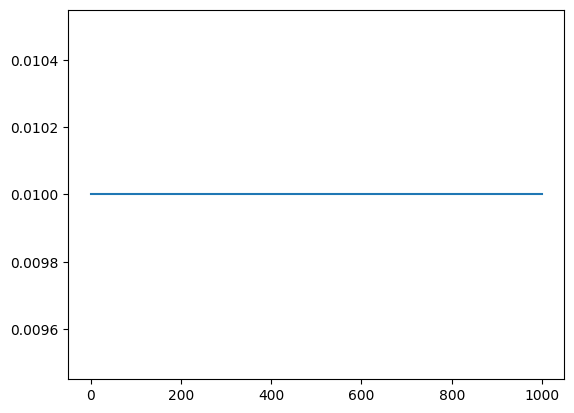

In [4]:
plt.plot([next(const) for i in range(1000)])

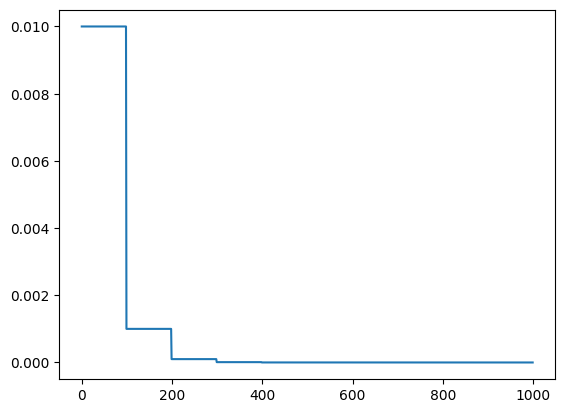

In [5]:
plt.plot([next(step) for i in range(1000)])

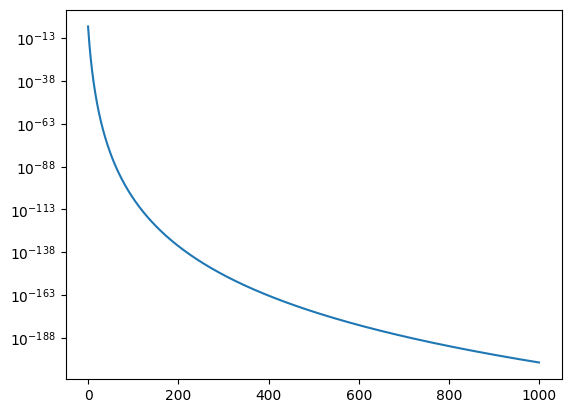

In [6]:
plt.semilogy([next(inv) for i in range(1000)])

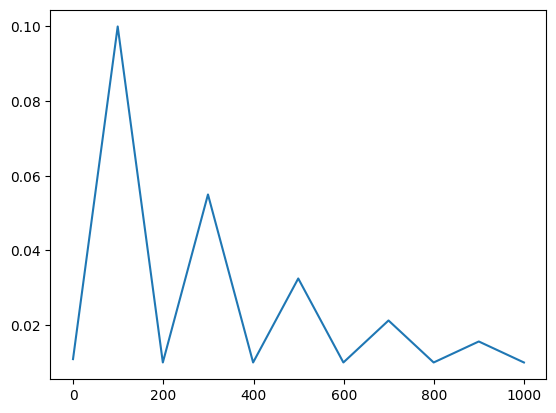

In [7]:
plt.plot([next(tri2) for i in range(1000)])

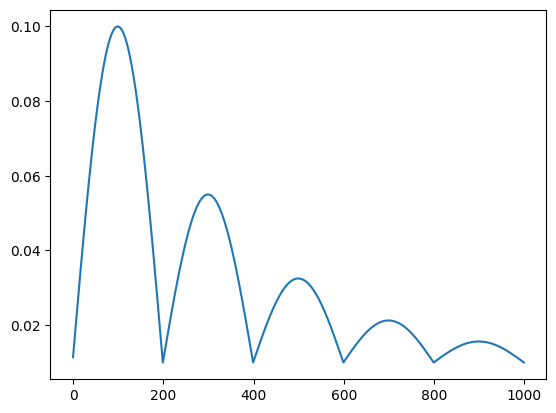

In [8]:
plt.plot([next(sin2) for i in range(1000)])